<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombre:** José Fernando Flores.

**Fecha:** 25 de febrero del 2020.

**Expediente** : 714575.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase 7


## Tarea 4
> Aplicaciones de simulación.

### Ejercicio 1: 
**Un juego de lanzamiento de una moneda:** Eres el afortunado ganador de un concurso de sorteos. Su premio es unas vacaciones con todos los gastos pagados en un hotel importante en Las Vegas, incluyendo algunas ﬁchas para apostar en el casino del hotel. Al ingresar al casino, descubres que, además de los juegos habituales (blackjack, ruleta, etc.), ofrecen un nuevo juego interesante con las siguientes reglas. Reglas del juego. 

1. Cada jugada del juego consiste en lanzar repetidamente una moneda imparcial hasta que la diferencia entre el número de caras lanzadas y el número de sellos es 3. 
2. Si decides jugar el juego, debes pagar 1 peso por cada lanzamiento de la moneda. No puedes salir durante una jugada del juego. 
3. Usted recibe 8 pesos al ﬁnal de cada uno de los juego. Por lo tanto, ganas dinero si el número de lanzamientos requeridos es menor a 8, pero pierdes dinero si se requieren más de 8 lanzamientos. Con el juego planteado anteriormente, responda las siguientes preguntas:
    
    a) ¿Cuál es el promedio de tiradas hasta que termina un juego? ¿cuál es su desviación estándar? (dibuja su histograma). 
    
    b) Para el inciso anterior ¿Cuál es la probabilidad de que tires más de 10 veces para terminar un juego? ¿ y de que tires menos de 5 veces?. 
    
    c) Imagina que lanzas 100 tiros exactos la moneda. ¿Cuál es tu valor esperado de $$ ganado/perdido? ¿Y tu valor más probable?¿Cuál es la probabilidad de ganar dinero? (Graﬁca el histograma de simulaciones). 
    
    d) Imagina que comienzas con $30 ¿Cuál es el valor esperado del número de tiradas que debes realizar antes de quedarte sin dinero? ¿Cuál es la probabilidad de realizar más de 150 tiradas? (graﬁca el histograma correspondiente).


In [1]:
# Código de solución
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
# Inciso a

# Funcion para juego
def juego():
    a = 0
    cont = 0
    while abs(a) < 3:
        x = np.random.randint(0,2)
        if x == 0:
            a+=1
        else:
            a-=1
        cont+=1
    return cont

In [2]:
# Promedio y desviación
N = 10000
x = np.array([juego() for i in range(N)])
print('El promedio de tiradas hasta ganar el juego es:',x.mean(),'mientras que la desviación es de:', x.std())

El promedio de tiradas hasta ganar el juego es: 9.0058 mientras que la desviación es de: 6.949328482666509


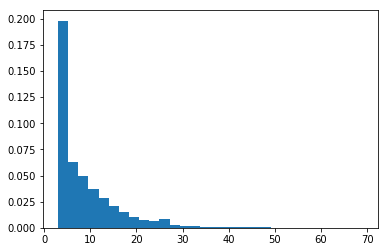

In [3]:
plt.hist(x,bins = 30, density=True)
plt.show()

In [4]:
# Inciso b
import scipy.stats
a = scipy.stats.norm(x.mean(), x.std()).cdf(4)
b = 1 - scipy.stats.norm(x.mean(), x.std()).cdf(11)
print('La probabilidad de tirar menos de 5 veces hasta ganar es de:',a)
print('La probabilidad de tirar más de 10 veces es de:',b)

La probabilidad de tirar menos de 5 veces hasta ganar es de: 0.2356613523409895
La probabilidad de tirar más de 10 veces es de: 0.3870703337151794


In [5]:
# Inciso c
import statistics
# Funcion para n tiros
def tiros(n):
    cont = 0
    a = 0
    ganancia=0
    while cont < n:
        x = np.random.randint(0,2)
        if x == 0:
            a+=1
        else:
            a-=1
        if abs(a) ==3:
            ganancia +=7 
            a = 0
        else:
            ganancia -=1
        cont+=1
    return ganancia

ganancias = np.array([tiros(100) for i in range(N)])
r = 1 - scipy.stats.norm(ganancias.mean(), ganancias.std()).cdf(0)
print('El promedio de ganancias con 100 tiros es de:', ganancias.mean(),'pesos.')
print('El valor más probable de ganancia es de:', statistics.mode(ganancias), 'pesos.')
print('La probabilidad de ganar dinero después de 100 tiros es de:' ,r)

El promedio de ganancias con 100 tiros es de: -12.1368 pesos.
El valor más probable de ganancia es de: -20 pesos.
La probabilidad de ganar dinero después de 100 tiros es de: 0.27822286918090444


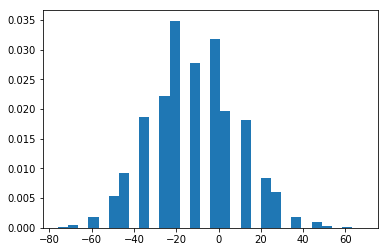

In [6]:
plt.hist(ganancias,bins = 30, density=True)
plt.show()

In [7]:
#Inciso d
# Funcion para n pesos
def gan(n):
    cont = 0
    a = 0
    ganancia=0
    while ganancia > -n:
        x = np.random.randint(0,2)
        if x == 0:
            a+=1
        else:
            a-=1
        if abs(a) ==3:
            ganancia +=7 
            a = 0
        else:
            ganancia -=1
        cont+=1
    return cont


f = np.array([gan(30) for i in range(N)])
f.mean()
k = 1 - scipy.stats.norm(f.mean(), f.std()).cdf(151)
k

0.6420234639671547

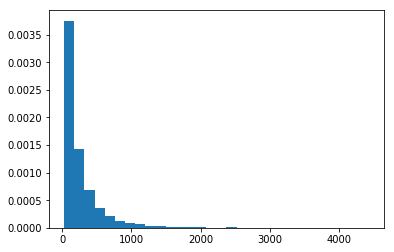

In [8]:
plt.hist(f,bins = 30, density=True)
plt.show()

### Ejercicio 2:
- El juego de dados requiere que el jugador arroje dos dados una o más veces hasta que se llegue a una decisión sobre si él (o ella) gana o pierde. Él gana si la primera tirada resulta en una suma de 7 u 11 o, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y la misma suma reaparece antes de que aparezca una suma de 7. Por el contrario, pierde si la primera tirada resulta en una suma de 2, 3 o 12 o, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y aparece una suma de 7 antes de la primera suma reaparece.

a) calcule la probabilidad de ganar corriendo 10,000 simulaciones. 

b) Imagina que cada juego ganas o pierdes 50 pesos. Si inicias con 500 pesos. ¿Cuál es tu valor esperado de dinero después de 10 juegos? ¿y el más probable? ¿Cuál es la probabilidad de ganar dinero?.


In [9]:
# Codigo de solucion
def juego711():
    n=100
    suma = np.random.randint(1,7,n)+np.random.randint(1,7,n)
    
        
    a = 0
    b = []
    while abs(a)<1:
        if suma[0] in (7,11):
            a+=1
            b.append(1)
        elif suma[0] in (2,3,12):
            a+=1
            b.append(-1)
            
        else:
            d=0
            j=1
            while abs(d)<1 and j<10000:
                if suma[j] == 7:
                    d+=1
                    b.append(-1)
                elif suma[j]==suma[j-1]:
                    b.append(1)
                    d-=1
                j+=1
        return b

In [10]:
# Probabilidad de ganar
sim711 = np.array([juego711() for i in range(10000)])
Gan = list(filter(lambda x: x== 1, sim711 ))
Prob_Gan711 = len(Gan)/len(sim711)
print('La probabilidad de ganar es de:',Prob_Gan711)

La probabilidad de ganar es de: 0.4701


In [11]:
# Para 10 juegos, iniciando con $500
from scipy import stats
z = np.array([np.array([juego711() for i in range(10)]).sum()*50+500 for j in range(10000)])
u = list(filter(lambda x: x>500, z ))
pgan = len(u)/len(z)
print('Tu valor esperado después de 10 juegos iniciando con $500 es de:',z.mean())
print('El valor más frecuente de dinero después de 10 juegos iniciando con $500 es de:',stats.mode(z)[0])
print('La probabilidad de ganar dinero después de 10 juegos es de:',pgan)

Tu valor esperado después de 10 juegos iniciando con $500 es de: 478.58
El valor más frecuente de dinero después de 10 juegos iniciando con $500 es de: [500]
La probabilidad de ganar dinero después de 10 juegos es de: 0.326


### Ejercicio 3:
- Una inversión en cetes actualmente promete un rendimiento que va entre el 8% y el 12% anual.

a) Considera la cantidad total de dinero que obtendrás al ﬁnal del año dado una inversión inicial de $300000. Realiza un programa que simule 10,000 escenarios diferentes que puedan suceder, calcula su media, su desviación estándar y graﬁca su histograma. 

b) Ahora supón que dejas el dinero durante 6 años, Realiza un programa que simule 10,000 escenarios diferentes que puedan suceder, calcula su media, su desviación estándar y graﬁca su histograma. ¿Cuál es la probabilidad de ganar más de $58000? ¿Cuál es la probabilidad de ganar menos de 55000 pesos?.


c) Repite el inciso b), pero suponiendo que el rendimiento es discreto, es decir, solo puede tomar los valores enteros 8,9,10,11,12. ¿Cuál es la probabilidad de ganar entre $53000 y 56000 pesos?


In [12]:
# Código de solución 
# Inciso a

rend = np.random.uniform(low=0.08, high=0.12, size=(10000,))
a = np.array([300000*i + 300000 for i in rend])
print('media:', a.mean(),'y desviación estándar:', a.std())

media: 330006.14938329277 y desviación estándar: 3416.496718691956


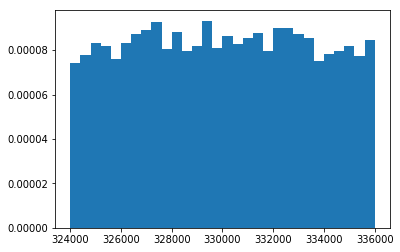

In [13]:
# Inciso a
plt.hist(a, bins = 30, density= True)
plt.show()

In [14]:
# Inciso b 
inv = 300000*np.ones(10000)
x=0
while x <6:
    r = np.random.uniform(low=0.08, high=0.12, size=(10000,))
    b = np.array([inv[i]*r[i] + inv[i] for i in range(len(r))])
    inv = b
    x+=1
print('media:', b.mean(),'y desviación estándar:', b.std())

media: 531547.3412528166 y desviación estándar: 13580.94402893692


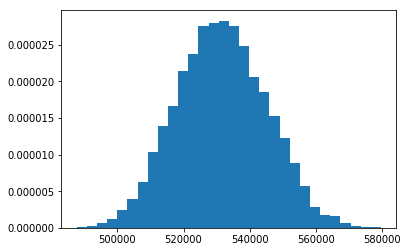

In [15]:
plt.hist(b, bins = 30, density= True)
plt.show()

In [16]:
# El inciso indica $58,000, pero se suponen $580,000 ya que de lo contrario las probabilidades
# serían 100% y 0%

P_mayor58 = 1 - scipy.stats.norm(b.mean(), b.std()).cdf(580000)
P_menor53 = scipy.stats.norm(b.mean(), b.std()).cdf(530000)
print('La probabilidad de ganar más de 580,000 es de:',P_mayor58)
print('La probabilidad de ganar menos de 530,000 es de:',P_menor53)

La probabilidad de ganar más de 580,000 es de: 0.00018006804847781055
La probabilidad de ganar menos de 530,000 es de: 0.4546447653267958


In [17]:
# Inciso c
inv = 300000*np.ones(10000)
x=0
while x <6:
    r = np.array([0.01*np.random.randint(8,12) for i in range(10000)])
    c = np.array([inv[i]*r[i] + inv[i] for i in range(len(r))])
    inv = c
    x+=1
p_mayor56 = 1 - scipy.stats.norm(c.mean(), c.std()).cdf(560000)
p_menor53 = scipy.stats.norm(c.mean(), c.std()).cdf(530000)
                                                    
print('Media:', c.mean(),'y desviación estándar:', c.std())
print('La probabilidad de ganar más de 560,000 es de:',p_mayor56)
print('La probabilidad de ganar menos de 530,000 es de:',p_menor53)

Media: 517089.85029566335 y desviación estándar: 12955.09315516198
La probabilidad de ganar más de 560,000 es de: 0.00046278967153945416
La probabilidad de ganar menos de 530,000 es de: 0.8405038518492782


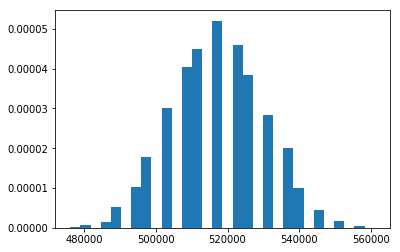

In [18]:
plt.hist(c, bins = 30, density= True)
plt.show()

### Ejercicio 4:
-  Use the mixed congruential method to generate the following sequences of random numbers.

a) A sequence of 10 one-digit random integer numbers such that xn+1 = (xn + 3)(mod10) and x0 = 2 

b) A sequence of eight random integer numbers between 0 and 7 such thatxn+1 = (5xn +1)(mod8) and x0 = 1. 

c) A sequence of ﬁve two-digit random integer numbers such that xn+1 = (61xn + 27)(mod100) and x0 = 10.


In [36]:
def cong_method1(x0:"Semilla inicial",a:"Multiplicador",b:"Incremento", m:"Módulo",
                 n:"Número de elementos"):
    '''
    Esta función contiene la programación del método congruencial para la sucesión x_n = (ax_{n−1} + b) mod m
    sin utilizar ciclo for convencional     
    '''
    x = np.zeros(n)
    x[0] = x0
    def llenar_vector(i):
        nonlocal x
        x[i+1] = (a * x[i] + b) % m
    [llenar_vector(i) for i in range(n-1)]
    return x

In [38]:
# inciso a
print(cong_method1(2,1,3,10,10))

[2. 5. 8. 1. 4. 7. 0. 3. 6. 9.]


In [39]:
# Inciso b
print(cong_method1(1,5,1,8,8))

[1. 6. 7. 4. 5. 2. 3. 0.]


In [40]:
# Inciso c
print(cong_method1(10,61,27,100,5))

[10. 37. 84. 51. 38.]
